# [Quesiont-1;marks = 2+2+6]
Consider the following data. Both batsmen having the same means

In [12]:
import pandas as pd
import seaborn as sns

data = {'Batsman A':  [50,63,45,36,68,33,55,72,47,81],
        'Batsman B': [0,0,0,58,181,33,47,64,96,71]
        }

df = pd.DataFrame(data)

print(df['Batsman A'].mean())
print(df['Batsman B'].mean())

55.0
55.0


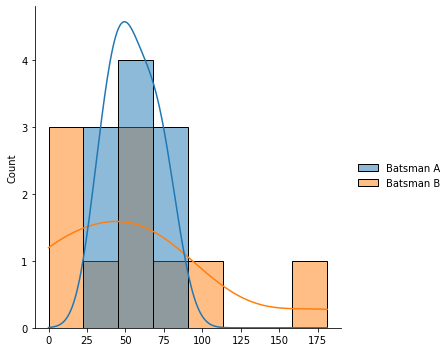

In [25]:
# 1. Which batsman score is normally distributed, draw a graph using python code

#Ans: Batsman A data is normally distributed depending upon his curve.
    
sns.displot(df, kde=True)


In [39]:
#2. As both have the same mean, what would be the other best way to compare batsman performance? 

#Let us calculate coefficient of variation for both data one by one
#For Both Batsman, Mean is same as 55
#For calculating standard deviation:
mean_A = df['Batsman A'].mean()
mean_B = df['Batsman B'].mean()

import statistics
stdev_A = statistics.stdev([50,63,45,36,68,33,55,72,47,81])
stdev_B = statistics.stdev([0,0,0,58,181,33,47,64,96,71])

#Coefficient of variation for batsman:
coe_A = (stdev_A/mean_A)*100
coe_B = (stdev_B/mean_B)*100

print(stdev_A)
print(stdev_B)
print(coe_A)
print(coe_B)
    
# As we can see CVA=28.63 and CVB=100.55 therefore,
#coefficient of variation for batsman B is greatar than coefficient of variation for batsman A.
#Therefore, batsman A is more consistent than batsman B in scoring the runs.

15.748015748023622
55.30320464895723
28.632755905497493
100.55128117992223


# [Quesiont-2; marks = 4]
Consider the following data 


In [98]:
data = {'Batsman A':  [50,63,45,36,68,33,None,72,47,81],
        'Batsman B': [0,0,0,58,None,33,47,64,96,71]
        }

df = pd.DataFrame(data)
df

,Batsman A,Batsman B
0,50.0,0.0
1,63.0,0.0
2,45.0,0.0
3,36.0,58.0
4,68.0,NaN
5,33.0,33.0
6,NaN,47.0
7,72.0,64.0
8,47.0,96.0
9,81.0,71.0


In [99]:
#What is the best way to fill the missing value of both batsmen? Justify your filling selection technique. 

#Ans: Linear Interpolation means estimating a missing value by connecting dots in the straight line in increasing order.
# It estimates the unknown value in the same increasing order as the previous values. if data is consistent so it is the best
# way to fill missing values. However, for this dataset, every method will give the same result. It accurately fill the missing
# value for Batsman A but failed to fill the Batsman B value because of the consistency and increasing order of data.


df.interpolate(method ='linear', limit_direction ='forward', inplace=True)
df

,Batsman A,Batsman B
0,50.0,0.0
1,63.0,0.0
2,45.0,0.0
3,36.0,58.0
4,68.0,45.5
5,33.0,33.0
6,52.5,47.0
7,72.0,64.0
8,47.0,96.0
9,81.0,71.0


# [Quesiont-3; marks = 10]
Consider the diabetes.csv data and answer the following questions using python code. 


In [104]:
import pandas as pd

dft = pd.read_csv('diabetes_quiz1.csv')

dft.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0.0,33.6,0.627,50,Yes has diabetes
1,1,85,66,29,0.0,26.6,0.351,31,No
2,8,183,64,0,0.0,23.3,0.672,32,Yes has
3,1,89,66,23,94.0,28.1,0.167,21,No has not diabetes
4,0,137,40,35,168.0,43.1,2.288,33,Yes
5,5,116,74,0,0.0,NaN,0.201,30,NO
6,3,78,50,32,88.0,31.0,0.248,26,YES
7,10,115,0,0,0.0,35.3,0.134,29,No more diabetes
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,0,0.0,0.0,0.232,54,1


In [103]:
#1. What would be the best way to fill the BMI missing value if you have allowed augmenting some new attributes? 
dft['BMI'].isnull().sum()
dft['BMI'].interpolate(method ='linear', limit_direction ='forward', inplace=True)
dft['BMI'].head(10)

#Ans: Linear Interpolation means estimating a missing value by connecting dots in the straight line in increasing order.
# It estimates the unknown value in the same increasing order as the previous values. if data is consistent so it is the best
# way to fill missing values. However, for this dataset, BMI have minimum variation so interpolate would be best in this case 

0    33.60
1    26.60
2    23.30
3    28.10
4    43.10
5    37.05
6    31.00
7    35.30
8    30.50
9     0.00
Name: BMI, dtype: float64

In [129]:
#2. Make the unequal 3 bins of the “Pregnancies” attribute and store them in the “Pregnancies_new” attribute

Pregnancies_new = pd.cut(dft['Pregnancies'], bins=3,labels= [0,1,2])
dft['Pregnancies_new'] = Pregnancies_new
dft.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes,Pregnancies_new
0,6,148,72,35,0.0,33.6,0.627,50,Yes has diabetes,1
1,1,85,66,29,0.0,26.6,0.351,31,No,0
2,8,183,64,0,0.0,23.3,0.672,32,Yes has,1
3,1,89,66,23,94.0,28.1,0.167,21,No has not diabetes,0
4,0,137,40,35,168.0,43.1,2.288,33,Yes,0
5,5,116,74,0,0.0,NaN,0.201,30,NO,0
6,3,78,50,32,88.0,31.0,0.248,26,YES,0
7,10,115,0,0,0.0,35.3,0.134,29,No more diabetes,1
8,2,197,70,45,543.0,30.5,0.158,53,1,0
9,8,125,96,0,0.0,0.0,0.232,54,1,1


In [181]:
# 3. Some values of “BloodPresure” and “SkinThikness” attributes are 0, replace the 0 with an appropriate value(s)
BloodPressure = dft['BloodPressure']
BloodPressure.replace(to_replace = 0, value = BloodPressure.mean(), inplace=True)

SkinThickness = dft['SkinThickness']
SkinThickness.replace(to_replace = 0, value = SkinThickness.median(), inplace=True)

dft.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes,Pregnancies_new
0,6,148,72.000000,35,0.0,33.6,0.627,50,Yes has diabetes,1
1,1,85,66.000000,29,0.0,26.6,0.351,31,No,0
2,8,183,64.000000,23,0.0,23.3,0.672,32,Yes has,1
3,1,89,66.000000,23,94.0,28.1,0.167,21,No has not diabetes,0
4,0,137,40.000000,35,168.0,43.1,2.288,33,Yes,0
5,5,116,74.000000,23,0.0,NaN,0.201,30,NO,0
6,3,78,50.000000,32,88.0,31.0,0.248,26,YES,0
7,10,115,69.105469,23,0.0,35.3,0.134,29,No more diabetes,1
8,2,197,70.000000,45,543.0,30.5,0.158,53,1,0
9,8,125,96.000000,23,0.0,0.0,0.232,54,1,1


C:\Users\sss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

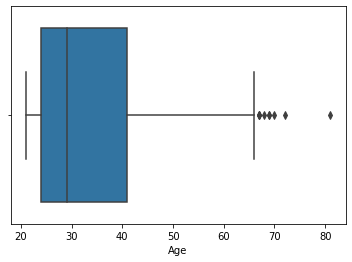

In [191]:
sns.boxplot(dft.Age)

In [234]:
#4. Visualize the outlier of the “Age” attribute, and count the outliers using the “standard
#deviation & mean” and quartile deviation methods.

def find_boundaries(dft):
    sorted(dft)
    Q1,Q3 = np.percentile(dft , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [235]:
lowerbound,upperbound = find_boundaries(dft.Age)

In [236]:
dft.Age[(dft.Age < lowerbound) | (dft.Age > upperbound)]

123    69
363    67
453    72
459    81
489    67
537    67
666    70
674    68
684    69
Name: Age, dtype: int64

In [237]:
dft.Age[(dft.Age < lowerbound) | (dft.Age > upperbound)].count()

9

C:\Users\sss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

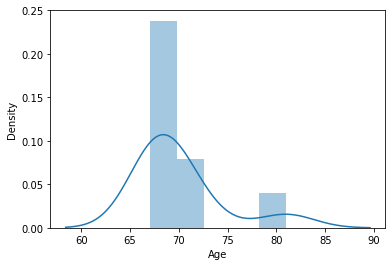

In [250]:
sns.distplot(dft.Age[(dft.Age < lowerbound) | (dft.Age > upperbound)])

In [277]:
# by Mean and standard deviation Method

mean = dft['Age'].mean()
stdev =  statistics.stdev(dft.Age)

lower_limit = mean - (3 * stdev)
upper_limit = mean + (3 * stdev)

outliers = [i for i in dft["Age"] if i<lower_limit or i>upper_limit]
print(len(outliers))
print(outliers)

5
[69, 72, 81, 70, 69]


C:\Users\sss\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

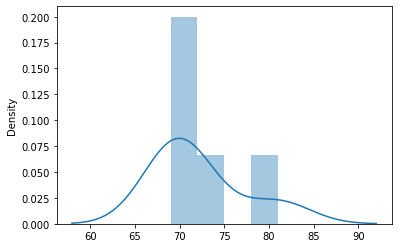

In [278]:
sns.distplot(outliers)

In [323]:
# 5. Handle the outlier using the NaN method. 
# use pandas.dataframe.mask to replace outliers with Nan to get faster result.

dft.mask(dft.sub(dft.mean()).div(dft.std()).abs().gt(2))


C:\Users\sss\AppData\Local\Temp\ipykernel_5916\731176075.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dft.mask(dft.sub(dft.mean()).div(dft.std()).abs().gt(2))


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes has diabetes
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,No
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Yes has
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,No has not diabetes
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0,Yes
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [398]:
# 6. Convert all values in 1 and 0 forms in the “Diabetes” attribute (not included) 

dft['Diabetes'] = dft['Diabetes'].replace({'Yes','NO'} ,
    {1,0}, regex=True)

dft['Diabetes'] = dft['Diabetes'].replace({'No','YES'} ,
    {0,1}, regex=True)
dft.Diabetes

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Diabetes, Length: 768, dtype: object